# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. (copied from the internet)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests


def ecdf(data):
    n = float(len(data))
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
print(df.head())
print(len(df))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
130


2. The sample size is 130 so this should qualify as a large sample so z test is appropriate.

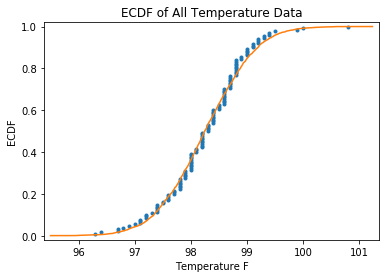

(98.249230769230778, 0.73035777890503795)
(-5.4548232923640771, 4.902157014113424e-08)
Ttest_1sampResult(statistic=-5.4548232923640771, pvalue=2.4106320415610081e-07)
[ 96.7225  99.4775]


In [28]:
x, y = ecdf(df['temperature'])
_ = plt.plot(x,y,marker=".",linestyle='none')
xmean = np.mean(x)
xstd = np.std(x)
xnorm, ynorm = ecdf(np.random.normal(xmean,xstd,4000))
_ = plt.plot(xnorm,ynorm)
plt.xlabel('Temperature F')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.title("ECDF of All Temperature Data")
plt.show()
hbt_mean = np.mean(x)
hbt_std = np.std(x)
print(hbt_mean,hbt_std)
ztest = stests.ztest(x,value=98.6)
print(ztest)
ttest = stats.ttest_1samp(x,98.6)
print(ttest)
print(np.percentile(x,[2.5,97.5]))

1. The distribution of the combined set of data appears to be normal.
3. The NULL hypothesis is that the mean of the data is 98.6.
    The p-value of the the Z-Test is 4.902e-08 so the null hypothesis is rejected.
    The p-value of the the T-Test is 2.411e-07 so the null hypothesis is rejected.
    These result are similar because the sample size is large
    
The mean temperature calculated from the data is 98.249 degrees F.
The standard deviation of the temperature is 0.7304 degrees F. 

5. The range of temperatures in the 95th percentile ranges from 96.7225 to 99.4775 as calculated from the data. Outside this range would definitely be abnormal.

In [27]:
x_small = np.random.choice(x,10)
ztest_small = stests.ztest(x_small,value=98.6)
ttest_small = stats.ttest_1samp(x_small,98.6)
print(ztest_small)
print(ttest_small)

(-0.46597684120949329, 0.64123207745920929)
Ttest_1sampResult(statistic=-0.46597684120949329, pvalue=0.6523036235003361)


4. I'm not sure what this tells me. The t-test is more appropriate for sample size less than 30. 
    Results are highly dependent on which 10 samples are chosen for the test.

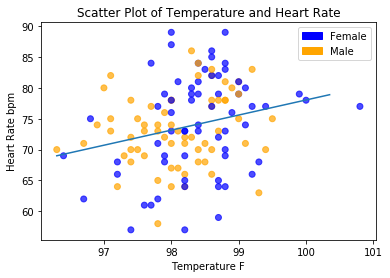

In [21]:
xtemp = df['temperature']
ytemp = df['heart_rate']
ctemp = []
for entry in df.gender:
    if entry == 'M':
        ctemp.append('orange')
    else:
        ctemp.append('blue')

_ = plt.scatter(xtemp,ytemp,c = ctemp,alpha=0.7)
z = np.polyfit(xtemp,ytemp,1)
xfit = np.arange(min(xtemp),max(xtemp),(max(xtemp)-min(xtemp))/10.0)
yfit = z[0] * xfit + z[1]
_ = plt.plot(xfit,yfit)
plt.xlabel('Temperature F')
plt.ylabel('Heart Rate bpm')
b_patches = mpatches.Patch(color='blue',label='Female')
o_patches = mpatches.Patch(color='orange',label='Male')
plt.legend(handles=[b_patches,o_patches])
plt.margins(0.05)
plt.title("Scatter Plot of Temperature and Heart Rate")
plt.show()

Is slope of fit line statistically significant?

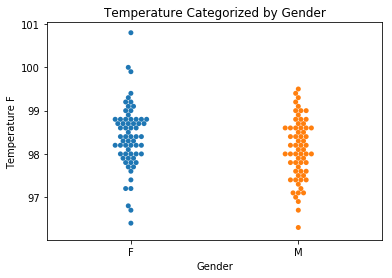

In [45]:
_ = sns.swarmplot(x='gender',y='temperature',data=df)
plt.xlabel('Gender')
plt.ylabel('Temperature F')
plt.title('Temperature Categorized by Gender')
plt.show()

There appears to be a difference in the distribution of temperatures in male and female cases. Is the significant?

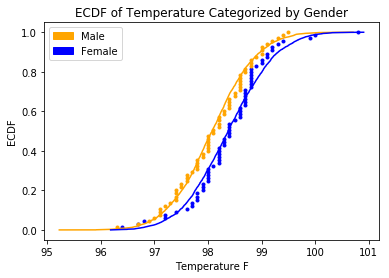

('Male Mean', 98.104615384615371, 'Male STD', 0.69335988418286987)
('Female Mean', 98.393846153846141, 'Female STD', 0.73774644864289662)
0.294384767154
6.20311201787
(-2.2854345381656103, 0.02228736076065755)


In [31]:
temp_f = []
temp_m = []
for indx, row in df.iterrows():
    if row[1] == 'F':
        temp_f.append(row[0])
    else:
        temp_m.append(row[0])
f_std = np.std(temp_f)
m_std = np.std(temp_m)
f_mean = np.mean(temp_f)
m_mean = np.mean(temp_m)
x_temp_f, y_temp_f = ecdf(temp_f)
x_temp_m, y_temp_m = ecdf(temp_m)
xmt, ymt = ecdf(np.random.normal(m_mean,m_std,4000))
xft, yft = ecdf(np.random.normal(f_mean,f_std,4000))
_ = plt.plot(x_temp_f,y_temp_f,marker=".",linestyle='none',c='blue')
_ = plt.plot(x_temp_m,y_temp_m,marker=".",linestyle='none',c='orange')
_ = plt.plot(xmt,ymt,c='orange')
_ = plt.plot(xft,yft,c='blue')
plt.xlabel('Temperature F')
plt.ylabel('ECDF')
b_patches = mpatches.Patch(color='blue',label='Female')
o_patches = mpatches.Patch(color='orange',label='Male')
plt.legend(handles=[o_patches,b_patches])
plt.title('ECDF of Temperature Categorized by Gender')
plt.show()
print('Male Mean', m_mean, "Male STD", m_std)
print('Female Mean', f_mean, "Female STD", f_std)
print(((f_mean-m_mean)/((m_mean+f_mean)/2.0))*100.0)
print(((f_std-m_std)/((m_std+f_std)/2.0))*100.0)
ztest_mf = stests.ztest(temp_m,temp_f)
print(ztest_mf)

6.  The NULL hypothesis is that the male and female temperature means are the same.
    The p-value from the z-test is 0.0223 which is less than 0.05 so there is a statistically significant difference in the two distributions.
    
The data provided do not show a mean human body temperature of 98.6. Instead the mean of the data is 98.249. Using z-test results this difference was shown to be statisticaly significant. There is also a small but statistically significant difference in the HBT measured in the male and female test subject. 